# **Development Environment Setup**

In [1]:
! pip install -q kaggle

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle

In [4]:
! kaggle datasets download -d jessemostipak/hotel-booking-demand

  0% 0.00/1.25M [00:00<?, ?B/s]
100% 1.25M/1.25M [00:00<00:00, 134MB/s]


In [5]:
!unzip /content/hotel-booking-demand.zip

Archive:  /content/hotel-booking-demand.zip
  inflating: hotel_bookings.csv      


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# **Data Preprocessing & EDA**

In [7]:
df = pd.read_csv('/content/hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
df.shape

(119390, 32)

In [10]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [11]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [12]:
df.fillna(0, inplace = True)

In [13]:
# dropping the rows having 0 adult,children and babies at same time

filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
df= df[~filter]
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [14]:
df.shape

(119210, 32)

## Exploratory data analysis (EDA)

In [15]:
!pip install sort-dataframeby-monthorweek
!pip install sorted-months-weekdays

  Preparing metadata (setup.py) ... done
  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3419 sha256=e6bb1fe535ae71d22e1f872bd0d391f8ba3ba799fc125657233e43db3f242eef
  Stored in directory: /root/.cache/pip/wheels/6b/fd/39/06eaac8d65d641f9f50856a48b57a5ec8351be2874beff01ec
Successfully built sort-dataframeby-monthorweek
  Preparing metadata (setup.py) ... done
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3223 sha256=45d32a8fda421466a730bb3d8000b05a415311c7253de6672f534cef7328b9ec
  Stored in directory: /root/.cache/pip/wheels/bd/b4/f6/2c29a96668a9a13a568134857fd7b7a5186261f00f1d35661c
Successfully built sorted-months-weekdays


**Variation of Price per month**

In [16]:
data_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
table = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
table.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
table

,month,price_for_resort,price_for_city_hotel
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983
5,July,150.122528,115.818019
6,June,107.974850,117.874360
7,March,57.056838,90.658533
8,May,76.657558,120.669827
9,November,48.706289,86.946592


In [17]:
#Sorting Table in order
import sort_dataframeby_monthorweek as sd
def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)
sorted_table = sort_month(table, 'month')
sorted_table

,month,price_for_resort,price_for_city_hotel
0,January,48.761125,82.330983
1,February,54.147478,86.520062
2,March,57.056838,90.658533
3,April,75.867816,111.962267
4,May,76.657558,120.669827
5,June,107.974850,117.874360
6,July,150.122528,115.818019
7,August,181.205892,118.674598
8,September,96.416860,112.776582
9,October,61.775449,102.004672


In [18]:
plt.figure(figsize = (17, 8))
px.line(sorted_table, x = 'month', y = ['price_for_resort','price_for_city_hotel'],title = 'Variation of Price per month')

<Figure size 1700x800 with 0 Axes>

**Occupancy of Room per month**

In [19]:
resort_guests = data_resort['arrival_date_month'].value_counts().reset_index()
resort_guests.columns=['month','no of guests']
city_guests = data_city['arrival_date_month'].value_counts().reset_index()
city_guests.columns=['month','no of guests']
final_guests = resort_guests.merge(city_guests,on='month')
final_guests.columns=['month','no of guests in resort','no of guest in city hotel']
final_guests = sort_month(final_guests,'month')
final_guests

,month,no of guests in resort,no of guest in city hotel
0,January,1866,2249
1,February,2308,3051
2,March,2571,4049
3,April,2550,4010
4,May,2535,4568
5,June,2037,4358
6,July,3137,4770
7,August,3257,5367
8,September,2102,4283
9,October,2575,4326


In [20]:
px.line(final_guests, x = 'month', y = ['no of guests in resort','no of guest in city hotel'],
        title='Occupancy of Rooms per month')

<ipython-input-21-d87b415cc42d>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



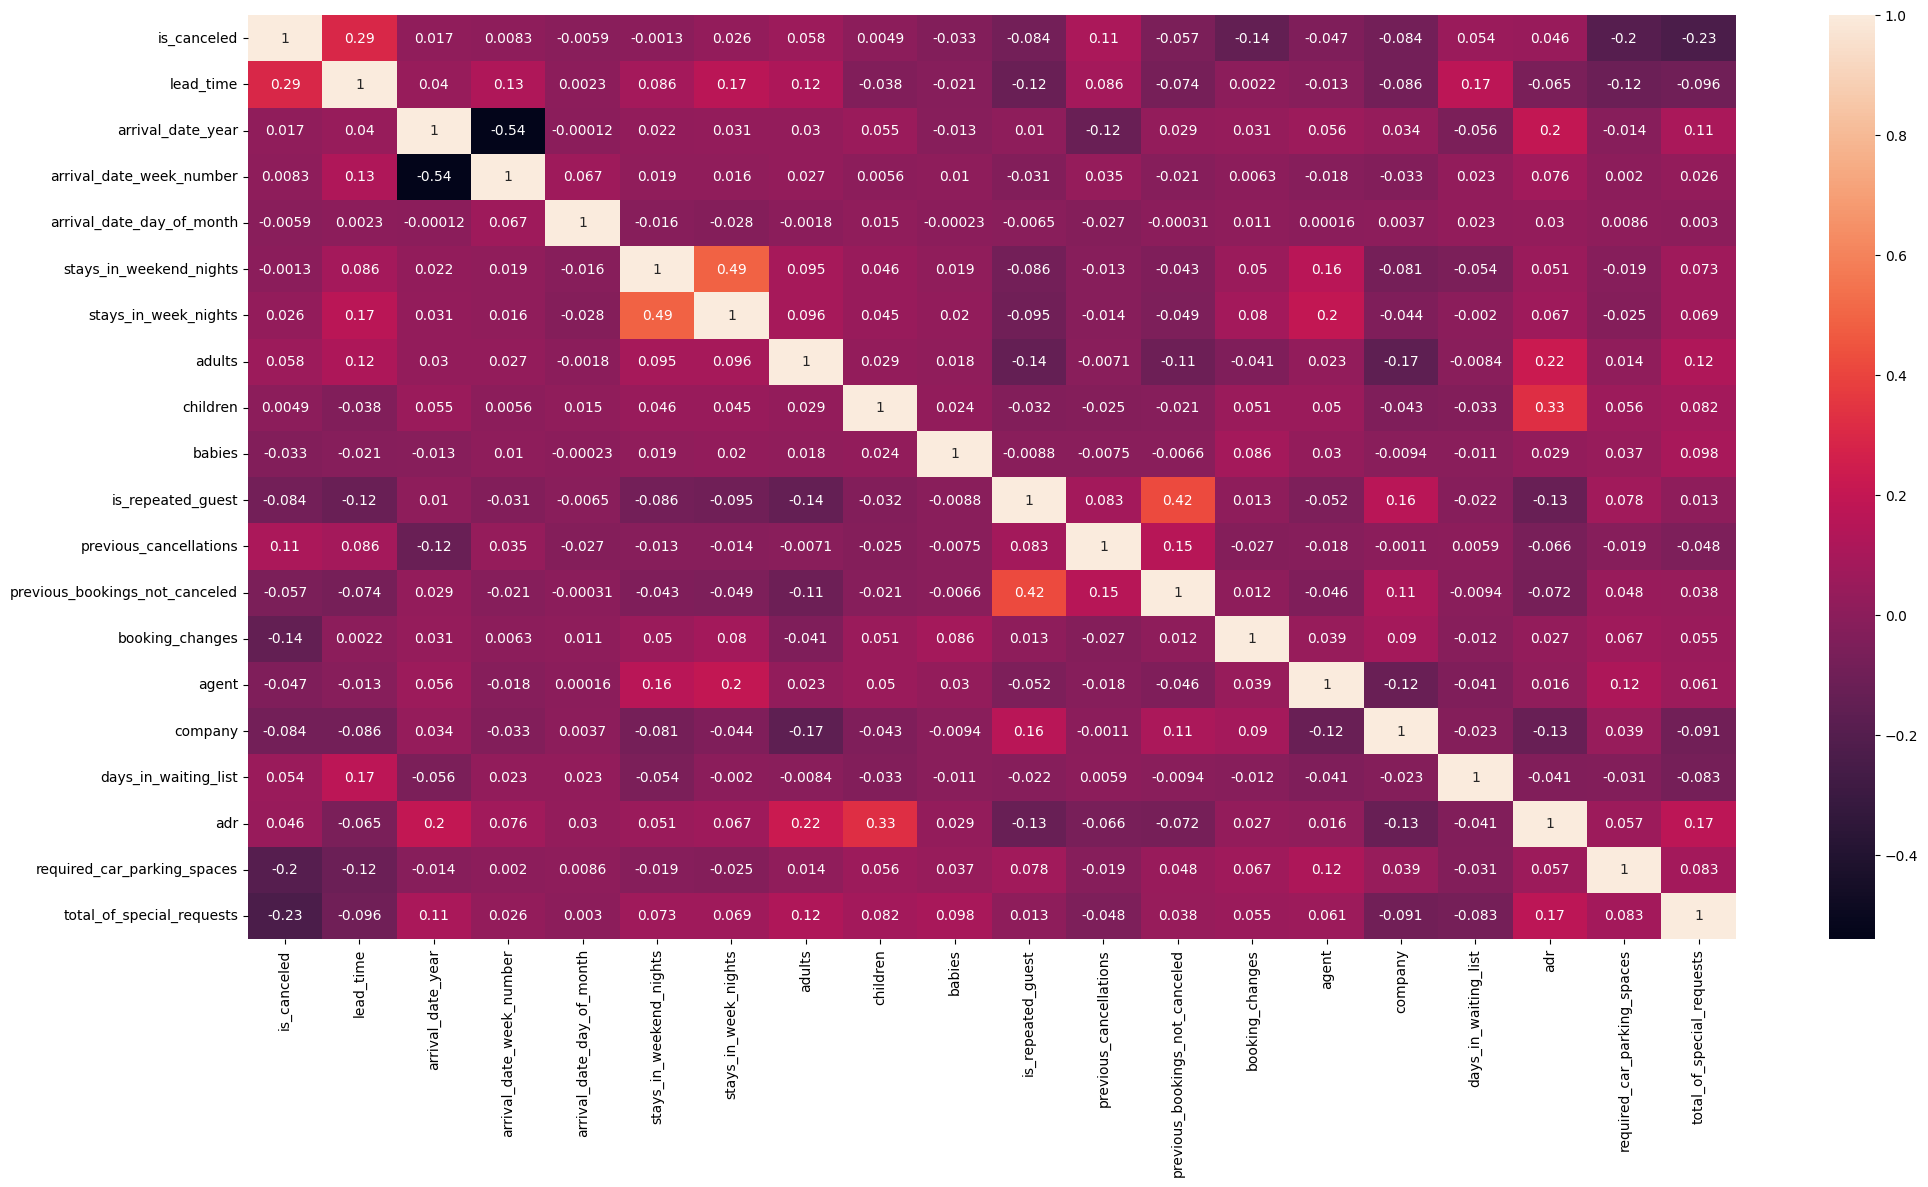

In [21]:
plt.figure(figsize = (24, 12))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [22]:
correlation = df.corr()['days_in_waiting_list'].abs().sort_values(ascending = False)
correlation

<ipython-input-22-c538b1a89a7b>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



days_in_waiting_list              1.000000
lead_time                         0.170008
total_of_special_requests         0.082755
arrival_date_year                 0.056348
stays_in_weekend_nights           0.054399
is_canceled                       0.054301
agent                             0.041182
adr                               0.040859
children                          0.033293
required_car_parking_spaces       0.030601
company                           0.022944
arrival_date_week_number          0.022677
arrival_date_day_of_month         0.022532
is_repeated_guest                 0.022057
booking_changes                   0.011916
babies                            0.010627
previous_bookings_not_canceled    0.009416
adults                            0.008365
previous_cancellations            0.005941
stays_in_week_nights              0.002026
Name: days_in_waiting_list, dtype: float64

## Data Preprocessing

In [23]:
# Dropping unnecessary (non feature) columns
useless_col = ['lead_time','is_canceled','arrival_date_week_number','market_segment','country','distribution_channel','previous_cancellations','previous_bookings_not_canceled','reserved_room_type','assigned_room_type','booking_changes','agent','company','adr','reservation_status','reservation_status_date']
df.drop(useless_col, axis = 1, inplace = True)

In [24]:
# creating numerical and categorical dataframes
cat_cols = [col for col in df.columns if df[col].dtype == 'O']
cat_df = df[cat_cols]
num_df = df.drop(columns = cat_cols, axis = 1)
num_df.drop('days_in_waiting_list', axis = 1, inplace = True)

In [25]:
cat_df.head

<bound method NDFrame.head of                hotel arrival_date_month meal deposit_type customer_type
0       Resort Hotel               July   BB   No Deposit     Transient
1       Resort Hotel               July   BB   No Deposit     Transient
2       Resort Hotel               July   BB   No Deposit     Transient
3       Resort Hotel               July   BB   No Deposit     Transient
4       Resort Hotel               July   BB   No Deposit     Transient
...              ...                ...  ...          ...           ...
119385    City Hotel             August   BB   No Deposit     Transient
119386    City Hotel             August   BB   No Deposit     Transient
119387    City Hotel             August   BB   No Deposit     Transient
119388    City Hotel             August   BB   No Deposit     Transient
119389    City Hotel             August   HB   No Deposit     Transient

[119210 rows x 5 columns]>

**Label Encoding**

In [26]:
le = LabelEncoder()
cat_df['hotel']=le.fit_transform(cat_df['hotel'])
cat_df['arrival_date_month']=le.fit_transform(cat_df['arrival_date_month'])
cat_df['meal']=le.fit_transform(cat_df['meal'])
cat_df['deposit_type']=le.fit_transform(cat_df['deposit_type'])
cat_df['customer_type']=le.fit_transform(cat_df['customer_type'])

<ipython-input-26-217aee3f71bf>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-26-217aee3f71bf>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-26-217aee3f71bf>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-26-217aee3

In [27]:
cat_df.head()

,hotel,arrival_date_month,meal,deposit_type,customer_type
0,1,5,0,0,2
1,1,5,0,0,2
2,1,5,0,0,2
3,1,5,0,0,2
4,1,5,0,0,2


In [28]:
num_df.head()

,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,required_car_parking_spaces,total_of_special_requests
0,2015,1,0,0,2,0.0,0,0,0,0
1,2015,1,0,0,2,0.0,0,0,0,0
2,2015,1,0,1,1,0.0,0,0,0,0
3,2015,1,0,1,1,0.0,0,0,0,0
4,2015,1,0,2,2,0.0,0,0,0,1


In [29]:
num_df.var()

arrival_date_year               0.500535
arrival_date_day_of_month      77.107192
stays_in_weekend_nights         0.990258
stays_in_week_nights            3.599010
adults                          0.330838
children                        0.159070
babies                          0.009508
is_repeated_guest               0.030507
required_car_parking_spaces     0.060201
total_of_special_requests       0.628652
dtype: float64

In [30]:
num_df['arrival_date_day_of_month'] = np.log(num_df['arrival_date_day_of_month'] + 1)
num_df['stays_in_week_nights'] = np.log(num_df['stays_in_week_nights'] + 1)

In [31]:
num_df.var()

arrival_date_year              0.500535
arrival_date_day_of_month      0.506325
stays_in_weekend_nights        0.990258
stays_in_week_nights           0.249537
adults                         0.330838
children                       0.159070
babies                         0.009508
is_repeated_guest              0.030507
required_car_parking_spaces    0.060201
total_of_special_requests      0.628652
dtype: float64

In [32]:
num_df.head()

,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,required_car_parking_spaces,total_of_special_requests
0,2015,0.693147,0,0.000000,2,0.0,0,0,0,0
1,2015,0.693147,0,0.000000,2,0.0,0,0,0,0
2,2015,0.693147,0,0.693147,1,0.0,0,0,0,0
3,2015,0.693147,0,0.693147,1,0.0,0,0,0,0
4,2015,0.693147,0,1.098612,2,0.0,0,0,0,1


In [33]:
x = pd.concat([cat_df, num_df], axis = 1)
y_org = df['days_in_waiting_list']

In [34]:
y=y_org.copy()
y.value_counts()

0      115517
39        227
58        164
44        141
31        127
        ...  
175         1
116         1
142         1
193         1
36          1
Name: days_in_waiting_list, Length: 127, dtype: int64

**Categorising target value into 4 categories**

In [35]:
def categorize_value(x):
    if x==0:
      return 0
    elif x <= 7:
      return 1
    elif x <= 30:
        return 2
    else:
        return 3
y = y.apply(categorize_value)

In [36]:
y.value_counts()

0    115517
3      3102
2       463
1       128
Name: days_in_waiting_list, dtype: int64

In [37]:
x.shape, y.shape

((119210, 15), (119210,))

**Train Test Split**

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [39]:
x_train.head()

,hotel,arrival_date_month,meal,deposit_type,customer_type,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,required_car_parking_spaces,total_of_special_requests
66156,0,0,0,0,2,2017,2.772589,0,0.693147,2,0.0,0,0,0,3
56682,0,11,0,0,2,2016,2.302585,2,1.098612,2,0.0,0,0,0,0
77480,0,11,0,0,3,2015,2.995732,1,0.693147,1,0.0,0,0,0,0
5115,1,0,2,0,3,2016,2.944439,1,0.693147,2,0.0,0,0,0,0
93917,0,5,2,0,2,2016,3.135494,2,1.791759,2,0.0,0,0,0,1


In [40]:
x_test.head()

,hotel,arrival_date_month,meal,deposit_type,customer_type,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,required_car_parking_spaces,total_of_special_requests
44440,0,10,0,1,2,2015,1.791759,1,1.386294,1,0.0,0,0,0,0
118337,0,1,3,0,2,2017,2.772589,0,1.609438,2,0.0,0,0,0,3
43786,0,11,0,0,3,2015,3.218876,0,1.098612,1,0.0,0,0,0,0
116566,0,5,0,0,2,2017,3.044522,0,1.098612,1,0.0,0,0,0,0
58187,0,10,0,0,2,2016,2.079442,1,1.098612,3,0.0,0,0,0,0


In [41]:
y_train.head()

66156    0
56682    0
77480    0
5115     0
93917    0
Name: days_in_waiting_list, dtype: int64

In [42]:
y_test.head()

44440     0
118337    0
43786     0
116566    0
58187     0
Name: days_in_waiting_list, dtype: int64

**Data Balancing using SMOTE**

In [51]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_smote,y_train_smote = smote.fit_resample(x_train,y_train)
y_train_smote.value_counts()

0    80867
3    80867
1    80867
2    80867
Name: days_in_waiting_list, dtype: int64

# **Model 1 - Decision Tree Classifier**

In [52]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train_smote, y_train_smote)

y_pred_dtc = dtc.predict(x_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.9867181164891089
Confusion Matrix : 
[[34279    13    93   265]
 [   13    31     0     3]
 [   26     0   108     0]
 [   61     1     0   870]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     34650
           1       0.69      0.66      0.67        47
           2       0.54      0.81      0.64       134
           3       0.76      0.93      0.84       932

    accuracy                           0.99     35763
   macro avg       0.75      0.85      0.79     35763
weighted avg       0.99      0.99      0.99     35763



In [53]:
input= pd.DataFrame([[1,5,0,0,2,2015,0.69,0,0,2,0,0,0,0,0]])
dtc.predict(input)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



array([0])

In [75]:
input= pd.DataFrame([[0,7,0,1,2,2016,3,0,1,1,0,0,0,0,0]])
dtc.predict(input)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



array([2])

In [76]:
input= pd.DataFrame([[0,11,2,0,3,2015,3.43,0,0.69,2,0,0,0,0,0]])
dtc.predict(input)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



array([3])

# **Model 2 -Random Forest Classifier**

In [54]:
rd_clf = RandomForestClassifier()
rd_clf.fit(x_train_smote, y_train_smote)

y_pred_rd_clf = rd_clf.predict(x_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print("Accuracy Score of Random Forest is : ",acc_rd_clf)
print("Confusion Matrix :\n",conf)
print("Classification Report :\n",clf_report)

Accuracy Score of Random Forest is : 0.9881162094902552
Confusion Matrix : 
[[34329     8    79   234]
 [   14    31     0     2]
 [   25     0   109     0]
 [   62     1     0   869]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     34650
           1       0.78      0.66      0.71        47
           2       0.58      0.81      0.68       134
           3       0.79      0.93      0.85       932

    accuracy                           0.99     35763
   macro avg       0.78      0.85      0.81     35763
weighted avg       0.99      0.99      0.99     35763



In [63]:
input= pd.DataFrame([[0,11,2,0,3,2015,3.43,0,0.69,2,0,0,0,0,0]])
rd_clf.predict(input)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



array([3])

In [71]:
input= pd.DataFrame([[0,8,0,0,2,2016,2,0,0,2,0,0,0,0,0]])
rd_clf.predict(input)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



array([0])

In [68]:
input= pd.DataFrame([[1,0,2,0,2,2016,2,2,8,4,0,2,0,3,5]])
rd_clf.predict(input)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



array([0])

In [72]:
input= pd.DataFrame([[0,7,0,1,2,2016,3,0,1,1,0,0,0,0,0]])
rd_clf.predict(input)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



array([2])

# Extracting Model as Pickle File

In [77]:
import pickle
pickle.dump(rd_clf,open('Project.pkl','wb'))